<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100"/>

<div>
    <font color=#690027 markdown="1"> 
        <h1>ZEENIVEAU IN OOSTENDE</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook wordt het toekomstig zeeniveau in Oostende voorspeld door toepassing van <em>regressie</em>.<br>
Er wordt gebruikgemaakt van de functionaliteiten van de Python-module <em>scikit-learn</em>. <br>
Het fenomeen <em>overfitting</em> wordt geïllustreerd. 
</div>

Het zeeniveau wordt beïnvloed door o.a. stijging van het volume van de watermassa bij een stijgende temperatuur, afsmeltende ijskappen en gletsjers, veranderende opslag van oppervlaktewater en grondwater. De globale klimaatverandering leidt nog deze eeuw tot een stijging van het zeeniveau met 18 tot 59 cm [1].<br>

**We bekijken de evolutie van het zeeniveau aan de Belgische kust sinds 1951. Oostende is het meetpunt aan onze kust met de langste ononderbroken meetreeks.** 

De hoogte van een punt wordt gemeten ten opzichte van de zeespiegel. <br>De zeespiegel staat echter niet altijd op dezelfde hoogte. Eb en vloed zorgen voor een verschil dat aan de Belgische kust ongeveer vier meter bedraagt. <br>Men heeft dus een referentiepunt nodig. Het gemiddelde zeeniveau bij eb in Oostende wordt gebruikt als nulpeil: de Tweede Algemene Waterpassing (TAW). In Nederland heeft men de gemiddelde zeespiegel tussen eb en vloed genomen: het Normaal Amsterdams Peil (NAP). Het TAW-referentiepunt ligt 2,33 meter onder het NAP-referentiepunt. Om nationale hoogtemetingen met elkaar te vergelijken, moet men rekening houden met de verschillende referentiepunten [2].<br><br>
**Het zeeniveau wordt uitgedrukt in mm RLR (Revised Local Reference); data t.o.v. de lokale referentie worden omgezet naar data t.o.v. het internationaal referentieniveau.**

### Nodige modules importeren

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

<div>
    <font color=#690027 markdown="1"> 
        <h2>1. Inlezen van de data</h2> 
    </font>
</div>

Het zeeniveau in Oostende wordt opgemeten sinds 1951. De waarden van deze metingen zijn terug te vinden op de website van de Vlaamse Milieumaatschappij [3].

In [2]:
zeeniveau = pd.read_csv("data/zeeniveau.csv", header=None) # in te lezen tabel heeft geen hoofding

In [3]:
zeeniveau.head()

,0,1
0,1951,6969
1,1952,6980
2,1953,6927
3,1954,6954
4,1955,6999


In [4]:
zeeniveau.tail()

,0,1
62,2013,7040
63,2014,7065
64,2015,7083
65,2016,7103
66,2017,7115


In [5]:
# deze tabel komt overeen met een matrix met 67 rijen en 2 kolommen
# [:,0] betekent: alles van de 0de kolom
# x komt overeen met jaartal, y met zeeniveau
# shape komt overeen met aantal rijen en kolommen in een matrix, waarbij 1 (1 rij of 1 kolom) niet wordt vermeld
# hieronder alle x'n en alle y's apart

x = zeeniveau[0]   
y = zeeniveau[1]   
x = np.array(x)
y = np.array(y)

In [6]:
print(x)
print(len(x))
print(x.shape)
print(y)
print(len(y))
print(y.shape)

[1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
67
(67,)
[6969 6980 6927 6954 6999 6935 6972 6998 6950 6982 7010 6962 6934 6952
 6983 7020 6998 6991 6985 6986 6961 6939 6969 6994 6969 6944 6989 6984
 6993 7000 7044 7019 7036 7016 7012 6986 7008 7057 7038 7040 6975 7004
 7007 7035 7056 6985 7020 7074 7067 7067 7090 7071 7067 7078 7057 7059
 7109 7090 7054 7067 7048 7046 7040 7065 7083 7103 7115]
67
(67,)


<div>
    <font color=#690027 markdown="1"> 
        <h2>2. De data weergeven in een puntenwolk </h2> 
    </font>
</div>

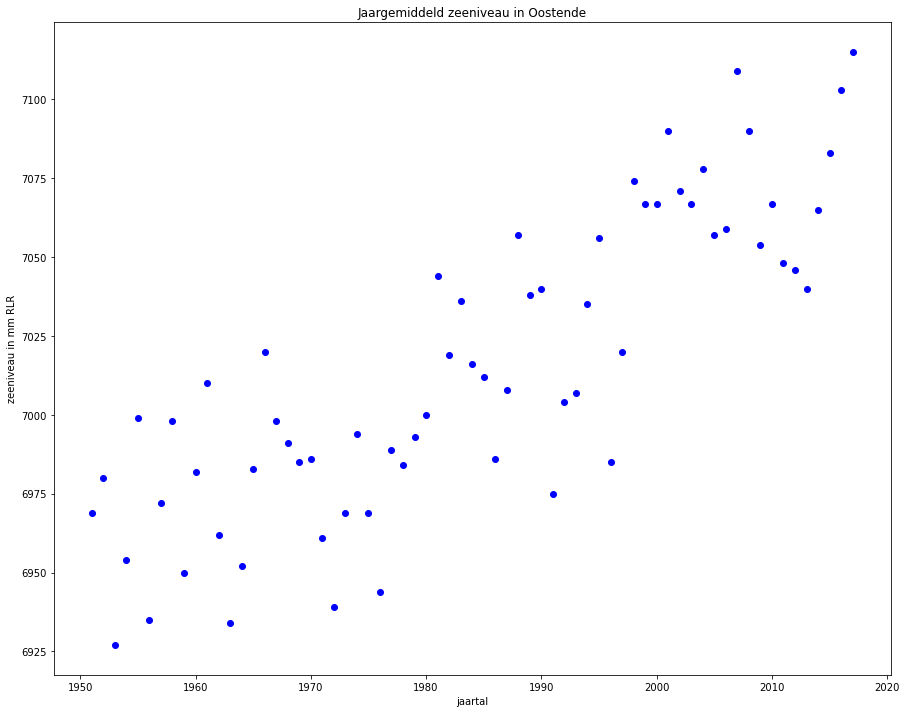

In [7]:
plt.figure(figsize=(15,12))    # om een grotere grafiek te krijgen, zodat punten meer verspreid

plt.title("Jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")

plt.show()

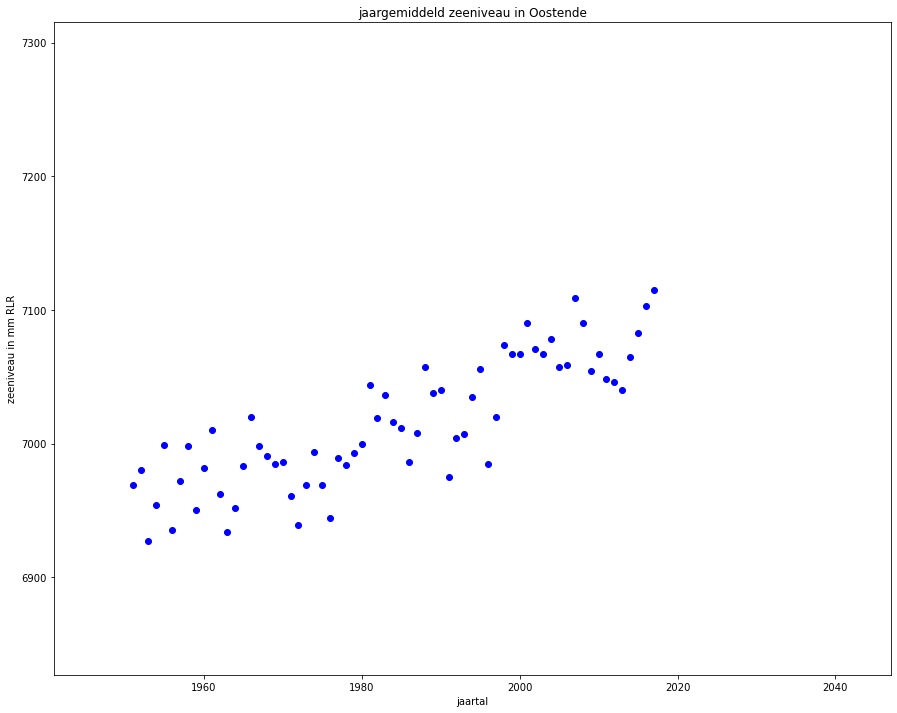

In [8]:
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+30)
plt.ylim(y.min()-100, y.max()+200)
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")

plt.show()

<div>
    <font color=#690027 markdown="1"> 
        <h2>3. Samenhang tussen x en y?</h2> 
    </font>
</div>

In [9]:
# in hoeverre is er een verband tussen de x- en de y-coördinaat van deze punten? 
# correlatiecoefficiënt R bepalen (ligt tussen -1 en 1; hoe dichter bij 0, hoe slechter de samenhang)
np.corrcoef(x, y)[0,1]

0.8380931683825255

Goede samenhang!

<div>
    <font color=#690027 markdown="1"> 
        <h2>4. Lineaire regressie</h2> 
    </font>
</div>

In [10]:
def rechte(x, a, b):
    """Voorschrift van rechte met parameters a en b."""
    return a * x + b

def linreg(x, y):
    popt, pcov = curve_fit(rechte, x, y)
    a, b = popt
    print("y = ", a, " x +", b)
    return a, b

In [11]:
a, b = linreg(x, y)

y =  2.0562694548670146  x + 2935.5405060324283


In [14]:
x_regressielijn = np.arange(1951, 2040, 10)
y_regressielijn = rechte(x_regressielijn, a, b)

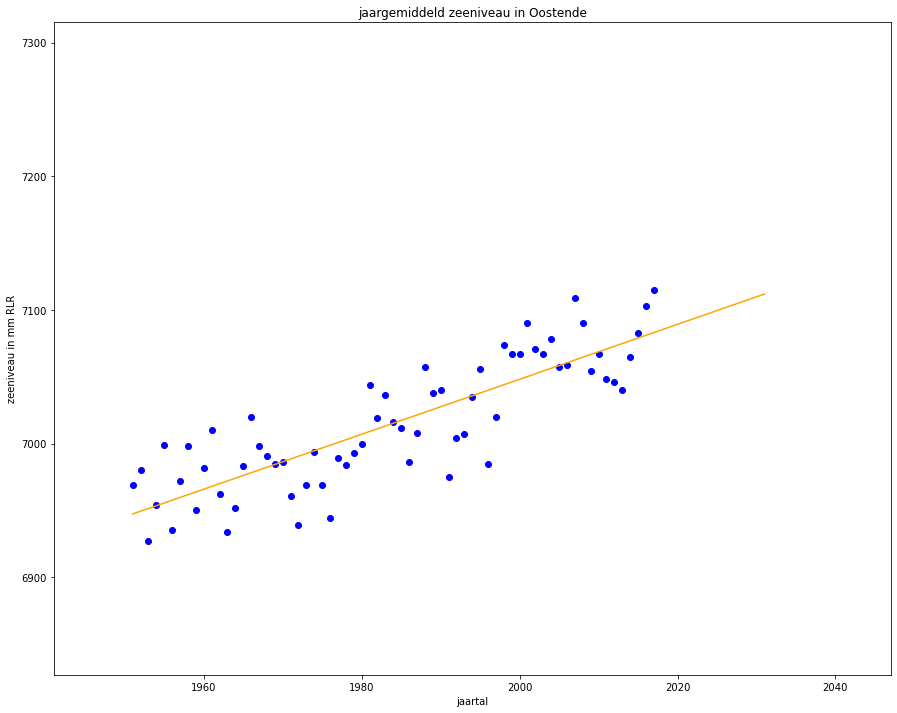

In [15]:
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+30)
plt.ylim(y.min()-100, y.max()+200)
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")
plt.plot(x_regressielijn, y_regressielijn, color="orange")

plt.show()

<div>
    <font color=#690027 markdown="1"> 
        <h2>5. Kwadratische regressie</h2> 
    </font>
</div>

In [16]:
def parabool(x, a, b, c):
    """Voorschrift van rechte met parameters a, b en c."""
    return a * x**2 + b * x + c

def kwadreg(x, y):
    popt, pcov = curve_fit(parabool, x, y)
    a, b, c = popt
    print("y = ", a, " x^2 +", b, "x +", c)
    return a, b, c

In [17]:
a, b, c = kwadreg(x, y)

y =  0.016477624751794484  x^2 + -63.32694556891428 x + 67789.5271779725


In [19]:
x_regressielijn = np.arange(1951, 2040, 10)
y2_regressielijn = parabool(x_regressielijn, a, b, c)

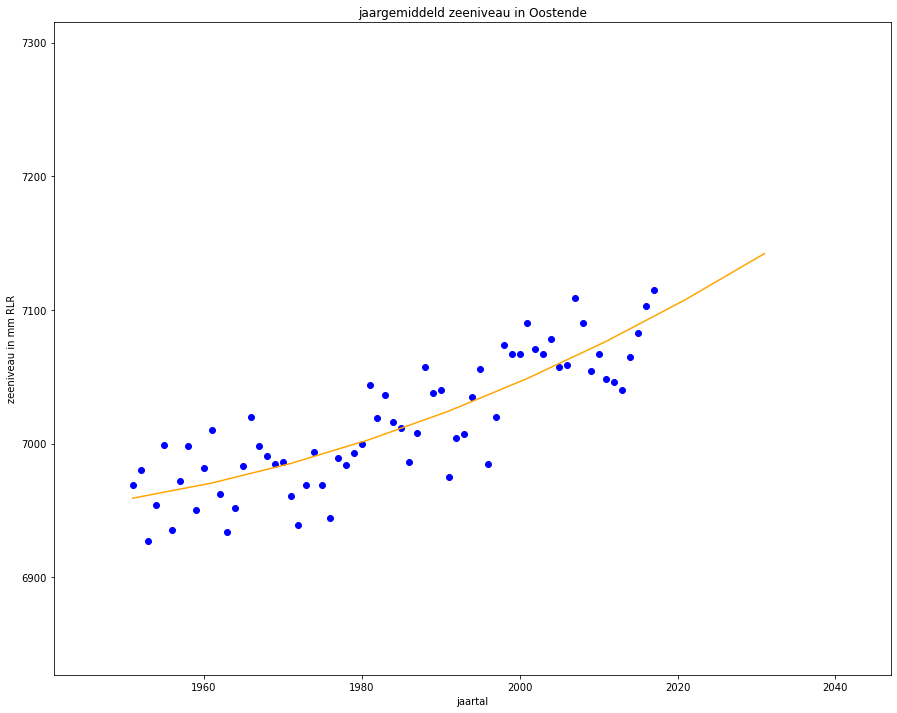

In [20]:
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+30)
plt.ylim(y.min()-100, y.max()+200)
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")
plt.plot(x_regressielijn, y2_regressielijn, color="orange")

plt.show()

<div>
    <font color=#690027 markdown="1"> 
        <h2>4. Trainingdata en testdata</h2> 
    </font>
</div>

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.1 Opsplitsen van de data</h3> 
    </font>
</div>

De data wordt opgesplitst in trainingdata en testdata.<br><br> *De trainingdata worden gebruikt om een wiskundig model op te stellen. <br>Met de testdata wordt nagegaan of het model goed omgaat met nieuwe data.*

In [ ]:
# De data voorbereiden

# trainingdata
x_train = x[0:57]
y_train = y[0:57]
print(x_train)
print(y_train)

# testdata
x_test = x[57:]
y_test = y[57:]
print(x_test)
print(y_test)

<div>
    <font color=#690027 markdown="1"> 
        <h3>4.2 Standaardiseren</h3> 
    </font>
</div>

De data worden als volgt **gestandaardiseerd**: van elk gegeven uit de trainingdata wordt het gemiddelde afgetrokken en vervolgens wordt het resultaat gedeeld door de standaardafwijking. Men berekent m.a.w. van alle trainingdata de Z-score. <br> Zo komen de meeste gegevens terecht tussen -1 en 1. <br>
Merk op dat men de volledige dataset op dezelfde manier standaardiseert. Men doet dus net hetzelfde met de testdata: men gebruikt er ook het gemiddelde en de standaardafwijking van de **trainingdata**. <br>
<br>
*Rekenen met vrij grote getallen leidt al snel tot nog grotere getallen en tot numerieke instabiliteit, dat is een van de redenen waarom de data worden gestandaardiseerd. Standaardiseren van variabelen houdt in dat men de variabelen op zo'n manier herschaalt dat men variabelen van bv. een verschillende grootteorde of in een verschillende eenheid met elkaar kan vergelijken of in verband kan brengen. De correlatie tussen bivariate gegevens bv. kan men visueel inschatten door de overeenkomstige puntenwolk te bekijken, de vorm hiervan is echter maar betrouwbaar als de gegevens gestandaardiseerd zijn. Ook zijn sommige algoritmes uit machine learning pas bruikbaar als de data gestandaardiseerd zijn, omdat die algoritmes zo opgesteld zijn.*<br>

In [ ]:
# gemiddelde en standaardafwijking van de trainingdata bepalen
x_train_gem = np.mean(x_train)
x_train_std = np.std(x_train)
y_train_gem = np.mean(y_train)
y_train_std = np.std(y_train)

# trainingdata standaardiseren
x_train = (x_train - x_train_gem) / x_train_std
X_train = x_train[:, np.newaxis]                  # omzetten naar gewenste formaat
y_train = (y_train - y_train_gem) / y_train_std
print(X_train)
print(y_train)
print(X_train.shape, y_train.shape)

# testdata
x_test = (x_test - x_train_gem ) / x_train_std
X_test = x_test[:, np.newaxis]                    # omzetten naar gewenste formaat
y_test = (y_test - y_train_gem) / y_train_std 
print(X_test)
print(y_test)
print(X_test.shape, y_test.shape)

<div>
    <font color=#690027 markdown="1"> 
        <h2>5. Regressie</h2> 
    </font>
</div>

*Regressie* gaat over het vinden van de best passende rechte of kromme bij gegeven punten.<br>
De beste passende rechte of *regressielijn* kan men rechtstreeks vinden met formules uit de wiskunde, maar hier passen we een techniek uit machinaal leren toe.<br>
Diezelfde techniek passen we ook toe om een best passende kromme te vinden. De gehanteerde krommen zijn grafieken van veeltermfuncties van verschillende graden. <br>

De gevonden kromme is niet altijd perfect passend. Er zit een fout op. <br>
Deze fout kan men bepalen door bv. *de gemiddelde kwadratische afwijking* te berekenen.<br> De vermelde afwijking is het verschil tussen de voorspelde en de werkelijke y-coördinaat van een punt. <br><br>
Met elke regressiekromme komt een fout overeen. In machinaal leren spreekt men van een *kostenfunctie*. <br>Men wil deze kostenfunctie minimaliseren: men gaat m.a.w. op zoek naar de regressiekromme met de kleinste fout. Bij dit proces moet men er wel over waken dat het model voldoende generaliseert en dus goed omgaat met nieuwe data; het model mag niet overfitten. 

<div>
    <font color=#690027 markdown="1"> 
        <h3>5.1 Lineaire regressie: rechte</h3> 
    </font>
</div>

In [ ]:
plt.figure(figsize=(15,12))
plt.xlim(x_train.min()-0.5, x_train.max()+2)
plt.ylim(y_train.min()-0.5, y_train.max()+2)
plt.scatter(X_train, y_train, color="blue", marker="o")
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal (gestandaardiseerd)")
plt.ylabel("zeeniveau in mm RLR (gestandaardiseerd)")

# lineaire regressie
rechte = LinearRegression()
rechte.fit(X_train, y_train)
plt.plot(X_train, rechte.predict(X_train), color='red')
print("R² voor de rechte m.b.t. de trainingdata: %.3f" % r2_score(y_train, rechte.predict(X_train)))
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata: %.2f"% mean_squared_error(y_train, rechte.predict(X_train)))
print("Gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata: %.2f"% mean_squared_error(y_test, rechte.predict(X_test)))

# controle vergelijking rechte 
print("rico: %.3f" % rechte.coef_[0])
print("y-intercept: %.3f" % rechte.intercept_)
x_nieuw = np.linspace(1950, 2040, 67)
x_nieuw = (x_nieuw - x_train_gem) / x_train_std
y_rechte = rechte.coef_[0] * x_nieuw + rechte.intercept_
plt.plot(x_nieuw, y_rechte, color="yellow", linestyle="dashed")

# testdata
plt.scatter(X_test, y_test, color="orchid", marker="o")

plt.show()

Interpretatie: de gemiddelde kwadratische afwijking voor de rechte m.b.t. de trainingdata is 0,37 en de gemiddelde kwadratische afwijking voor de rechte m.b.t. de testdata is 0,27. Deze fout is kleiner, dus er is een goede generalisatie. De rechte past zelfs beter bij de testdata dan bij de trainingdata. 
R² voor de rechte m.b.t. de trainingdata is 0,631. 

In [ ]:
# vergelijking van de rechte
print("De vergelijking van de rechte: y =", rechte.coef_[0], "x +", rechte.intercept_)

<div>
    <font color=#690027 markdown="1"> 
        <h3>5.2 Kwadratische regressie: parabool</h3> 
    </font>
</div>

In [ ]:
plt.figure(figsize=(15,12))
plt.xlim(x_train.min()-0.5, x_train.max()+2)
plt.ylim(y_train.min()-0.5, y_train.max()+2)
plt.scatter(X_train, y_train, color="blue", marker="o")
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal (gestandaardiseerd)")
plt.ylabel("zeeniveau in mm RLR (gestandaardiseerd)")

# kwadratische regressie
parabool = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)
parabool.fit(X_quad,y_train)
plt.plot(X_train, parabool.predict(X_quad), color="green")
print("R² voor de parabool m.b.t. de trainingdata: %.3f" % r2_score(y_train, parabool.predict(X_quad) ))
print("Gemiddelde kwadratische afwijking voor de parabool m.b.t. de trainingdata: %.2f" % mean_squared_error(y_train, parabool.predict(X_quad)))

# print(X_quad)

# controle vergelijking parabool
print(quadratic.get_feature_names())
coefficients = parabool.coef_[0], parabool.coef_[1], parabool.coef_[2], parabool.intercept_
print("De coëfficiënten van de vergelijking zijn:", coefficients)
x_nieuw = np.linspace(1950, 2040, 67)
x_nieuw = (x_nieuw - x_train_gem) / x_train_std
y_par = parabool.coef_[1] * x_nieuw + parabool.coef_[2] * x_nieuw**2 + parabool.intercept_
plt.plot(x_nieuw, y_par, color="yellow", linestyle="dashed")

# testdata
plt.scatter(X_test, y_test, color="orchid", marker="o")

plt.show()

In [ ]:
# vergelijking van de parabool
print("De vergelijking van de parabool: y =", parabool.coef_[2], "x² +", parabool.coef_[1], "x +", parabool.intercept_)

In [ ]:
X_test_quad = quadratic.fit_transform(X_test)
print("Gemiddelde kwadratische afwijking voor de parabool m.b.t. de trainingdata: %.2f" % mean_squared_error(y_train, parabool.predict(X_quad)))
print("Gemiddelde kwadratische afwijking voor de parabool m.b.t. de testdata: %.2f"% mean_squared_error(y_test, parabool.predict(X_test_quad)))
print("R² voor de parabool m.b.t. de trainingdata: %.3f" % r2_score(y_train, parabool.predict(X_quad) ))

**Parabool past beter bij de trainingdata in vergelijking met de rechte, maar minder goed bij de testdata.**

<div>
    <font color=#690027 markdown="1"> 
        <h3>5.3 Derdegraadskromme</h3> 
    </font>
</div>

In [ ]:
plt.figure(figsize=(15,12))
plt.xlim(x_train.min()-0.5, x_train.max()+2)
plt.ylim(y_train.min()-0.5, y_train.max()+2)
plt.scatter(X_train, y_train, color="blue", marker="o")
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal (gestandaardiseerd)")
plt.ylabel("zeeniveau in mm RLR (gestandaardiseerd)")

# regressie met derdegraadskromme
skromme = LinearRegression()
cubic = PolynomialFeatures(degree=3)
X_cub = cubic.fit_transform(X_train)
skromme.fit(X_cub,y_train)
plt.plot(X_train, skromme.predict(X_cub), color='green')
print("R² voor de derdegraadskromme m.b.t. de traindata: %.3f" % r2_score(y_train, skromme.predict(X_cub) ))
print("Gemiddelde kwadratische afwijking voor de derdegraadskromme m.b.t. de traindata: %.2f" % mean_squared_error(y_train, skromme.predict(X_cub)))

# controle vergelijking S-kromme
coefficients = skromme.coef_[0], skromme.coef_[1], skromme.coef_[2], skromme.coef_[3], skromme.intercept_
print("De coëfficiënten van de vergelijking zijn:", coefficients)
x_nieuw = np.linspace(1950, 2040, 67)    # 67 gebruiken omdat er 67 y's zijn
x_nieuw = (x_nieuw - x_train_gem)/x_train_std
y_skromme = skromme.coef_[1]* x_nieuw + skromme.coef_[2] * x_nieuw**2 + skromme.coef_[3] * x_nieuw**3 + skromme.intercept_                                                                            
plt.plot(x_nieuw, y_skromme, color="yellow", linestyle="dashed")

# testdata
plt.scatter(X_test, y_test, color="orchid", marker="o")

plt.show()

In [ ]:
# vergelijking van de S-kromme
print("De vergelijking van de S-kromme: y =", skromme.coef_[3], "x³ +", skromme.coef_[2], "x² +", skromme.coef_[1], "x +", skromme.intercept_)

In [ ]:
X_test_cub = cubic.fit_transform(X_test)

print("Gemiddelde kwadratische afwijking voor de derdegraadskromme m.b.t. de trainingdata: %.2f" % mean_squared_error(y_train, skromme.predict(X_cub)))
print("Gemiddelde kwadratische afwijking voor de derdegraadskromme m.b.t. de testdata: %.2f" % mean_squared_error(y_test, skromme.predict(X_test_cub)))
print("R² voor de derdegraadskromme m.b.t. de trainingdata: %.3f" % r2_score(y_train, skromme.predict(X_cub) ))

S-kromme past ongeveer even goed bij de trainingdata als de parabool, maar slechter bij de testdata dan de parabool. 

<div>
    <font color=#690027 markdown="1"> 
        <h3>5.4 Veeltermfunctie van de tiende graad</h3> 
    </font>
</div>

In [ ]:
plt.figure(figsize=(15,12))
plt.xlim(x_train.min()-0.5, x_train.max()+2)
plt.ylim(y_train.min()-0.5, y_train.max()+2)
plt.scatter(X_train, y_train, color="blue", marker="o")
plt.title("jaargemiddeld zeeniveau in Oostende")
plt.xlabel("jaartal (gestandaardiseerd)")
plt.ylabel("zeeniveau in mm RLR (gestandaardiseerd)")

# regressie met tiendegraadskromme
kromme = LinearRegression()
tiendegr = PolynomialFeatures(degree=10)
X_tien = tiendegr.fit_transform(X_train)
kromme.fit(X_tien,y_train)
plt.plot(X_train, kromme.predict(X_tien), color='green')
print("R² voor de tiendegraadskromme: %.3f" % r2_score(y_train, kromme.predict(X_tien) ))
print("Gemiddelde kwadratische afwijking voor de tiendegraadskromme: %.2f" % mean_squared_error(y_train, kromme.predict(X_tien)))

# controle vergelijking tiendegraadskromme
print(tiendegr.get_feature_names())
coefficients = kromme.coef_[0], kromme.coef_[1], kromme.coef_[2], kromme.coef_[3], kromme.coef_[4], kromme.coef_[5],\
        kromme.coef_[6], kromme.coef_[7], kromme.coef_[8], kromme.coef_[9], kromme.coef_[10], kromme.intercept_
print("De coëfficiënten van de vergelijking zijn:", coefficients)
x_nieuw = np.linspace(1950, 2040, 67)    # 67 gebruiken omdat er 67 y's zijn
x_nieuw = (x_nieuw - x_train_gem) / x_train_std
y_kromme = kromme.coef_[1]* x_nieuw + kromme.coef_[2] * x_nieuw**2 +  kromme.coef_[3] * x_nieuw**3 +  \
           kromme.coef_[4] * x_nieuw**4 + kromme.coef_[5] * x_nieuw**5 + kromme.coef_[6] * x_nieuw**6 + \
           kromme.coef_[7] * x_nieuw**7 + kromme.coef_[8] * x_nieuw**8 + kromme.coef_[9] * x_nieuw**9 + \
           kromme.coef_[10] * x_nieuw**10 + kromme.intercept_                                                                            
plt.plot(x_nieuw, y_kromme, color="yellow", linestyle="dashed")

# testdata
plt.scatter(X_test, y_test, color="orchid", marker="o")

plt.show()

In [ ]:
# vergelijking van de tiendegraadskromme
print("De vergelijking van de tiendegraadskromme: y =", kromme.coef_[1], "x +", kromme.coef_[2], "x² +",  \
           kromme.coef_[3], "x³ +", kromme.coef_[4], "x^4 +", kromme.coef_[5], "x^5 +", \
           kromme.coef_[6], "x^6 +", kromme.coef_[7], "x^7 +", kromme.coef_[8], "x^8 +", \
           kromme.coef_[9], "x^9 +", kromme.coef_[10], "x^10 +", kromme.intercept_ )

In [ ]:
X_test_tien = tiendegr.fit_transform(X_test)
print("Gemiddelde kwadratische afwijking voor de tiendegraadskromme m.b.t. de trainingdata: %.2f" % mean_squared_error(y_train, kromme.predict(X_tien)))
print("Gemiddelde kwadratische afwijking voor de tiendegraadskromme m.b.t. de testdata: %.2f" % mean_squared_error(y_test, kromme.predict(X_test_tien)))
print("R² voor de tiendegraadskromme m.b.t. de trainingdata: %.3f" % r2_score(y_train, kromme.predict(X_tien) ))

**Duidelijke overfitting** bij de tiendegraadskromme. Scoort veel, veel slechter op de testdata dan op de trainingdata.<br> 

Met hoe meer men rekening houdt, hoe beter de kromme zal passen bij de trainingdata, wat aangetoond wordt door de toename van R² (m.b.t. de trainingdata). Bij overfitting houdt men ook rekening met kenmerken van de trainingdata die niet relevant zijn.

<div>
    <font color=#690027 markdown="1"> 
        <h2>6. Stijging van het zeeniveau tussen 1951 en 2017</h2> 
    </font>
</div>

Op https://www.milieurapport.be te lezen: "Statistische analyse van de eigenlijke meetwaarden aan de Belgische kust laat zien dat het jaargemiddelde zeeniveau in 2017 significant hoger ligt dan bij het begin van de meetreeks enkele decennia geleden:
in Oostende steeg de trendlijn van het zeeniveau met 129 mm tussen 1951 en 2017". <br>
Controleer dit.

<div>
    <font color=#690027 markdown="1"> 
        <h3>6.1 De gemeten stijging</h3> 
    </font>
</div>

**De gemeten stijging is 146 mm.**

In [ ]:
# Berekenen zeeniveaustijging in mm tussen 1951 en 2017
# y is nog steeds de NumPy array van de gemeten zeeniveaus
print(y)
print(len(y))
print(y[66] - y[0])

We bekijken de stijging volgens de verschillende modellen.

<div>
    <font color=#690027 markdown="1"> 
        <h3>6.2 Stijging volgens de rechte</h3> 
    </font>
</div>

In [ ]:
# gekozen waarden voor x (stijging tussen 1951 en 2017)
# geef een nieuwe naam zodat de NumPy array x zelf niet wijzigt
x_stijging = np.array([1951, 2017])

# standaardiseren
x_stijging = (x_stijging - x_train_gem) / x_train_std
X_stijging = x_stijging[:, np.newaxis]
print(X_stijging)

In [ ]:
print("stijging volgens rechte")

y1_1951 = rechte.coef_[0] * (1951-x_train_gem)/x_train_std + rechte.intercept_
y1_2017 = rechte.coef_[0] * (2017-x_train_gem)/x_train_std + rechte.intercept_
print("eerste manier", y1_2017 - y1_1951)

# tweede manier
y_stijging = rechte.predict(X_stijging)
print(y_stijging)
print("tweede manier", y_stijging[1] - y_stijging[0])

# standaardiseren ongedaan maken
stijging = (y_stijging[1] - y_stijging[0]) * y_train_std     # twee keer + y_train_gem heffen elkaar op  
print("stijging zeeniveau volgens rechte is", stijging, "mm")

De stijging, berekend volgens de rechte, is ongeveer 13,9 cm, en is van dezelfde grootteorde als de gemeten stijging.

<div>
    <font color=#690027 markdown="1"> 
        <h3>6.3 Stijging volgens de parabool</h3> 
    </font>
</div>

In [ ]:
print("stijging volgens parabool")

#eerste manier
y2_1951 = parabool.coef_[1] * (1951-x_train_gem)/x_train_std + parabool.coef_[2] * ((1951-x_train_gem)/x_train_std)**2+ parabool.intercept_ 
y2_2017 = parabool.coef_[1] * (2017-x_train_gem)/x_train_std + parabool.coef_[2] * ((2017-x_train_gem)/x_train_std)**2 + parabool.intercept_ 
print("eerste manier", y2_2017 - y2_1951)

# tweede manier
X_stijging_quad = quadratic.fit_transform(X_stijging)  # omzetten naar geschikte formaat
y_stijging_quad = parabool.predict(X_stijging_quad)
print("tweede manier", y_stijging_quad[1] - y_stijging_quad[0])
print("stijging zeeniveau volgens parabool is",(y_stijging_quad[1] - y_stijging_quad[0]) * y_train_std, "mm" )

De stijging, berekend volgens de parabool, is ongeveer 16,5 cm, en is nog altijd van dezelfde grootteorde als de gemeten stijging.

<div>
    <font color=#690027 markdown="1"> 
        <h3>6.4 Stijging volgens de S-kromme</h3> 
    </font>
</div>

In [ ]:
print("stijging volgens S-kromme")

# eerste manier
y3_1951 = skromme.coef_[1] * (1951-x_train_gem)/x_train_std + skromme.coef_[2] * ((1951-x_train_gem)/x_train_std)**2 + skromme.coef_[3] * ((1951-x_train_gem)/x_train_std)**3 + skromme.intercept_ 
y3_2017 = skromme.coef_[1] * (2017-x_train_gem)/x_train_std + skromme.coef_[2] * ((2017-x_train_gem)/x_train_std)**2 + skromme.coef_[3] * ((2017-x_train_gem)/x_train_std)**3 + skromme.intercept_ 
print("eerste manier", y3_2017 - y3_1951)

# tweede manier
X_stijging_cub = cubic.fit_transform(X_stijging)  # omzetten naar geschikte formaat
y_stijging_cub = skromme.predict(X_stijging_cub)
print("tweede manier", y_stijging_cub[1] - y_stijging_cub[0] )
print("stijging zeeniveau volgens S-kromme is", (y_stijging_cub[1] - y_stijging_cub[0]) * y_train_std, "mm")

Deze waarde, 18,3 cm, wijkt al behoorlijk af van de gemeten waarde.

<div>
    <font color=#690027 markdown="1"> 
        <h3>6.5 Stijging volgens de tiendegraadskromme</h3> 
    </font>
</div>

In [ ]:
print("stijging volgens tiendegraadskromme")

# tweede manier
X_stijging_tien = tiendegr.fit_transform(X_stijging)  # omzetten naar geschikte formaat
y_stijging_tien = kromme.predict(X_stijging_tien)
print("stijging volgens de tiendegraadskromme is",(y_stijging_tien[1] - y_stijging_tien[0]) * y_train_std, "mm")

Deze waarde van 2619,6 cm ligt mijlenver af van de gemeten waarde.

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Vlaamse Milieumaatschappij (2019). Klimaatverandering. Geraadpleegd op 21 januari 2020 via https://www.milieurapport.be/milieuthemas/klimaatverandering<br>
[2] Frank De Boosere. (2010). Ten opzichte van welk nulpunt gebeuren de hoogtemetingen voor landkaarten? Geraadpleegd op 21 januari 2020 via https://www.frankdeboosere.be/vragen/vraag72.php <br> 
[3] Vlaamse Milieumaatschappij (2019). Zeeniveau. Geraadpleegd op 21 januari 2020 via https://www.milieurapport.be/milieuthemas/klimaatverandering/zeeklimaat/zeeniveau/zeeniveau

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.

<div>
    <h2>Met steun van</h2> 
</div>

<img src="images/kikssteun.png" alt="Banner" width="800"/>